# 1.Load dataset

In [2]:
! gdown https://drive.google.com/uc?id=1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN

Downloading...
From: https://drive.google.com/uc?id=1oGsM9EAFWiE28jDXT1IKhWwsqzIOcXcN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 19.9MB/s]


# 2.Dataset representation

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleveland.csv')
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang',
                'oldpeak','slope','ca','thal','target']
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
5,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
6,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
7,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
8,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1
9,57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,0


In [13]:
df['target'] = df['target'].map({0:0, 1:1, 2:1, 3:1, 4:1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        298 non-null    float64
 12  thal      300 non-null    float64
 13  target    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [14]:
df['ca'] = df.ca.fillna(df.ca.mean())
df['thal'] = df.thal.fillna(df.ca.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    float64
 12  thal      302 non-null    float64
 13  target    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


# 3.Ex_01 Distribution of age with target

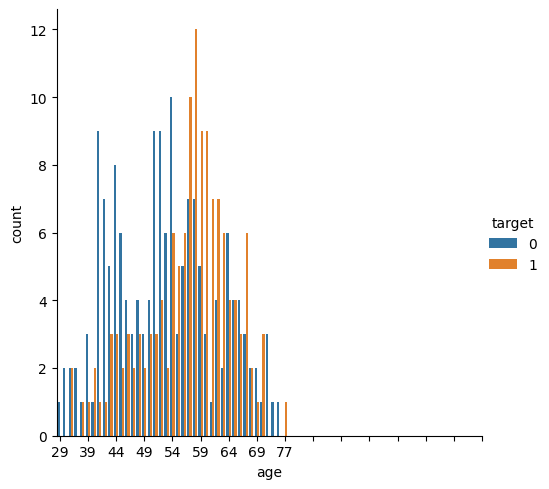

In [15]:
#distribution of target vs age
ax = sns.catplot(data=df, x='age', kind='count', hue='target')
ax.ax.set_xticks(np.arange(0,80,5))
plt.show()

# 4.Ex_02 Distribution of age, sex with target

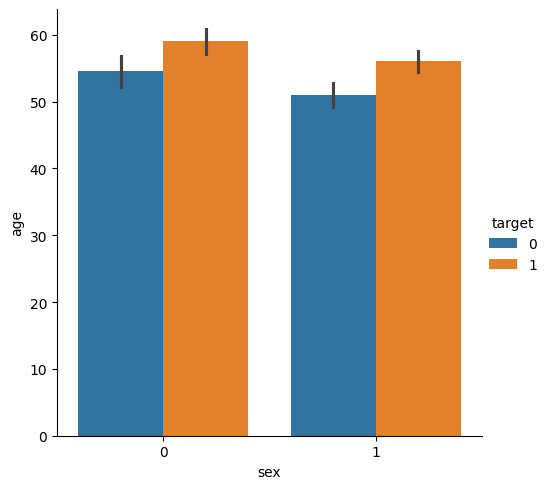

In [16]:
sns.catplot(data=df, x='sex', y='age', kind='bar', hue='target')

plt.show()

# 5.Ex_03 KNN K-Nearest Neighbor

In [24]:
#n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# your code here ***************************
from sklearn.neighbors import KNeighborsClassifier
#initiate the model
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
#train model use train data set
knn_classifier.fit(X_train, y_train)
#predict with test data set
y_predict = knn_classifier.predict(X_test)
y_predict_train = knn_classifier.predict(X_train)
#calculate confusion matrix
cm_train = confusion_matrix(y_predict_train, y_train)
cm_test = confusion_matrix(y_predict, y_test)

print("confusion matrix: train data set")
print(cm_train)
print("confusion matrix: test data set")
print(cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))

confusion matrix: train data set
[[102  29]
 [ 29  81]]
confusion matrix: test data set
[[18 10]
 [14 19]]

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.61


# 6.Ex_04 SVM - Support Vector Machine

In [26]:
#kernel = ’rbf’, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# your code here ***************************
from sklearn.svm import SVC
#initiate the model
svm_classifier = SVC(kernel='rbf', random_state=42)
#train model use train data set
svm_classifier.fit(X_train, y_train)
#predict with test data set
y_predict = svm_classifier.predict(X_test)
y_predict_train = svm_classifier.predict(X_train)
#calculate confusion matrix
cm_train = confusion_matrix(y_predict_train, y_train)
cm_test = confusion_matrix(y_predict, y_test)

print("confusion matrix: train data set")
print(cm_train)
print("confusion matrix: test data set")
print(cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))

confusion matrix: train data set
[[113  62]
 [ 18  48]]
confusion matrix: test data set
[[27 15]
 [ 5 14]]

Accuracy for training set for SVM = 0.67
Accuracy for test set for SVM = 0.67


# 7.Ex_05 Naive Bayes

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# your code here ***************************
from sklearn.naive_bayes import GaussianNB
#initiate the model
nb_classifier = GaussianNB()
#train model use train data set
nb_classifier.fit(X_train, y_train)
#predict with test data set
y_predict = nb_classifier.predict(X_test)
y_predict_train = nb_classifier.predict(X_train)
#calculate confusion matrix
cm_train = confusion_matrix(y_predict_train, y_train)
cm_test = confusion_matrix(y_predict, y_test)

print("confusion matrix: train data set")
print(cm_train)
print("confusion matrix: test data set")
print(cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))

confusion matrix: train data set
[[116  22]
 [ 15  88]]
confusion matrix: test data set
[[29  6]
 [ 3 23]]

Accuracy for training set for SVM = 0.85
Accuracy for test set for SVM = 0.85


# 8.Ex_06 Decision Tree

In [30]:
#criterion=’gini’, max_depth=10, min_samples_split=2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# your code here ***************************
from sklearn.tree import DecisionTreeClassifier
#initiate the model
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
#train model use train data set
dt_classifier.fit(X_train, y_train)
#predict with test data set
y_predict = dt_classifier.predict(X_test)
y_predict_train = dt_classifier.predict(X_train)
#calculate confusion matrix
cm_train = confusion_matrix(y_predict_train, y_train)
cm_test = confusion_matrix(y_predict, y_test)

print("confusion matrix: train data set")
print(cm_train)
print("confusion matrix: test data set")
print(cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for DT = {}'.format(accuracy_for_train))
print('Accuracy for test set for DT = {}'.format(accuracy_for_test))

confusion matrix: train data set
[[131   0]
 [  0 110]]
confusion matrix: test data set
[[28 12]
 [ 4 17]]

Accuracy for training set for DT = 1.0
Accuracy for test set for DT = 0.74


# 9.Ex_07 Random_Forest

In [33]:
#criterion=’gini’, max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# your code here ***************************
from sklearn.ensemble import RandomForestClassifier
#initiate the model
rf_classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42)
#train model use train data set
rf_classifier.fit(X_train, y_train)
#predict with test data set
y_predict = rf_classifier.predict(X_test)
y_predict_train = rf_classifier.predict(X_train)
#calculate confusion matrix
cm_train = confusion_matrix(y_predict_train, y_train)
cm_test = confusion_matrix(y_predict, y_test)

print("confusion matrix: train data set")
print(cm_train)
print("confusion matrix: test data set")
print(cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for Random Forrest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forrest = {}'.format(accuracy_for_test))

confusion matrix: train data set
[[130   1]
 [  1 109]]
confusion matrix: test data set
[[26  9]
 [ 6 20]]

Accuracy for training set for Random Forrest = 0.99
Accuracy for test set for Random Forrest = 0.75


# 10.Ex_08 AdaBoost

In [37]:
#n_estimators=50, learning_rate=1.0

X = df.iloc [: , :-1].values
y = df.iloc [: , -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# your code here ***************************
from sklearn.ensemble import AdaBoostClassifier
#initiate the model
ada_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
#train model use train data set
ada_classifier.fit(X_train, y_train)
#predict with test data set
y_predict = ada_classifier.predict(X_test)
y_predict_train = ada_classifier.predict(X_train)
#calculate confusion matrix
cm_train = confusion_matrix(y_predict_train, y_train)
cm_test = confusion_matrix(y_predict, y_test)

print("confusion matrix: train data set")
print(cm_train)
print("confusion matrix: test data set")
print(cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for Ada Boost = {}'.format(accuracy_for_train))
print('Accuracy for test set for Ada Boost = {}'.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


confusion matrix: train data set
[[126  11]
 [  5  99]]
confusion matrix: test data set
[[25  7]
 [ 7 22]]

Accuracy for training set for Ada Boost = 0.93
Accuracy for test set for Ada Boost = 0.77


# 11.Ex_09 GradientBoost

In [38]:
#learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42

X = df.iloc [:, :-1].values
y = df.iloc [:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# your code here ***************************
from sklearn.ensemble import GradientBoostingClassifier
#initiate the model
gra_classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)
#train model use train data set
gra_classifier.fit(X_train, y_train)
#predict with test data set
y_predict = gra_classifier.predict(X_test)
y_predict_train = gra_classifier.predict(X_train)
#calculate confusion matrix
cm_train = confusion_matrix(y_predict_train, y_train)
cm_test = confusion_matrix(y_predict, y_test)

print("confusion matrix: train data set")
print(cm_train)
print("confusion matrix: test data set")
print(cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for Gradient Boost = {}'.format(accuracy_for_train))
print('Accuracy for test set for Gradient Boost = {}'.format(accuracy_for_test))

confusion matrix: train data set
[[130   1]
 [  1 109]]
confusion matrix: test data set
[[26  5]
 [ 6 24]]

Accuracy for training set for Gradient Boost = 0.99
Accuracy for test set for Gradient Boost = 0.82


# 12.Ex10 XG Boost

In [44]:
#objective="binary:logistic", random_state=42, n_estimators = 100

X = df.iloc [:, :-1].values
y = df.iloc [:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# your code here ***************************
from xgboost import XGBClassifier
#initiate the model
xgb_classifier = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators = 100)
#train model use train data set
xgb_classifier.fit(X_train, y_train)
#predict with test data set
y_predict = xgb_classifier.predict(X_test)
y_predict_train = xgb_classifier.predict(X_train)
#calculate confusion matrix
cm_train = confusion_matrix(y_predict_train, y_train)
cm_test = confusion_matrix(y_predict, y_test)

print("confusion matrix: train data set")
print(cm_train)
print("confusion matrix: test data set")
print(cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for XGBoost = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBoost = {}'.format(accuracy_for_test))

confusion matrix: train data set
[[131   0]
 [  0 110]]
confusion matrix: test data set
[[27  4]
 [ 5 25]]

Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.85


# 13.Ex_11 Stacking

In [50]:
X = df.iloc [:, :-1].values
y = df.iloc [:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

knn = KNeighborsClassifier()
svc = SVC(kernel = 'rbf', random_state =42)
dtc = DecisionTreeClassifier(random_state =42)
rfc = RandomForestClassifier(random_state =42)
ad = AdaBoostClassifier(random_state =42)
gc = GradientBoostingClassifier(random_state =42)
xgb = XGBClassifier()

# your code here ***************************
from sklearn.ensemble import StackingClassifier
#initiate the model
stk_classifier = StackingClassifier(estimators=[('dtc', dtc), ('rfc', rfc), ('knn', knn), ('gc', gc), ('ad', ad), ('svc', svc)], final_estimator=xgb)
#train model use train data set
stk_classifier.fit(X_train, y_train)
#predict with test data set
y_predict = stk_classifier.predict(X_test)
y_predict_train = stk_classifier.predict(X_train)
#calculate confusion matrix
cm_train = confusion_matrix(y_predict_train, y_train)
cm_test = confusion_matrix(y_predict, y_test)

print("confusion matrix: train data set")
print(cm_train)
print("confusion matrix: test data set")
print(cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))
print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

confusion matrix: train data set
[[124   2]
 [  7 108]]
confusion matrix: test data set
[[27  9]
 [ 5 20]]

Accuracy for training set for Stacking = 0.96
Accuracy for test set for Stacking = 0.77
